## House Prices: Advanced Regression Techniques : Kaggle Competition

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [2]:
test_df=pd.read_csv('test.csv')

In [3]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
test_df.shape

(1459, 80)

### Step1: Check for missing values

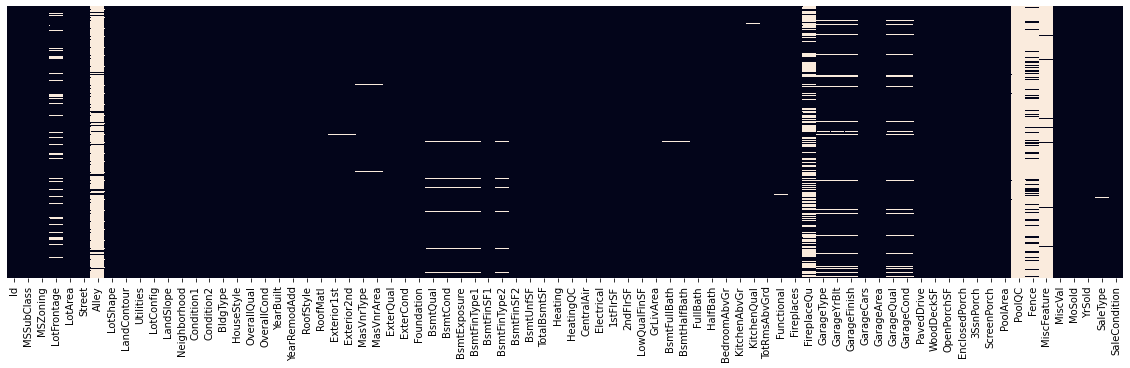

In [5]:
fig, ax = plt.subplots(figsize=(20,5))         # To change fig shape for better representation
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False, ax=ax)

In [6]:
def missing_zero_values_table(dataframe):
        zero_val = (dataframe == 0.00).astype(int).sum(axis=0)
        mis_val = dataframe.isnull().sum()
        mis_val_percent = 100 * dataframe.isnull().sum() / len(dataframe)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        zero_val = (dataframe == 0.00).astype(int).sum(axis=0)
        mis_val = dataframe.isnull().sum()
        mis_val_percent = 100 * dataframe.isnull().sum() / len(dataframe)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Data Type'] = dataframe.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(dataframe.shape[1]) + " columns and " + str(dataframe.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

In [7]:
missing_zero_values_table(test_df)

Your selected dataframe has 80 columns and 1459 Rows.
There are 33 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Data Type
PoolQC,0,1456,99.8,object
MiscFeature,0,1408,96.5,object
Alley,0,1352,92.7,object
Fence,0,1169,80.1,object
FireplaceQu,0,730,50.0,object
LotFrontage,0,227,15.6,float64
GarageCond,0,78,5.3,object
GarageYrBlt,0,78,5.3,float64
GarageQual,0,78,5.3,object
GarageFinish,0,78,5.3,object


### Step 2: Filling Missing values and droping columns whose missing >70%

In [8]:
# droping columns whose missing >70%
# this will remain same as in Train
test_df.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

In [9]:
missing_zero_values_table(test_df)

Your selected dataframe has 76 columns and 1459 Rows.
There are 29 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Data Type
FireplaceQu,0,730,50.0,object
LotFrontage,0,227,15.6,float64
GarageYrBlt,0,78,5.3,float64
GarageCond,0,78,5.3,object
GarageQual,0,78,5.3,object
GarageFinish,0,78,5.3,object
GarageType,0,76,5.2,object
BsmtCond,0,45,3.1,object
BsmtQual,0,44,3.0,object
BsmtExposure,0,44,3.0,object


#### Handling Missing data : categorical data with MODE & numerical data with MEAN

In [10]:
test_df['FireplaceQu'].value_counts()

Gd    364
TA    279
Fa     41
Po     26
Ex     19
Name: FireplaceQu, dtype: int64

In [11]:
test_df['FireplaceQu'].fillna(value='Gd', inplace=True) 

In [12]:
test_df['LotFrontage'].mean()

68.58035714285714

In [13]:
test_df['LotFrontage'].fillna(value=70.05, inplace=True)

In [14]:
test_df['GarageType'].value_counts()

Attchd     853
Detchd     392
BuiltIn     98
2Types      17
Basment     17
CarPort      6
Name: GarageType, dtype: int64

In [15]:
test_df['GarageType'].fillna(value='Attchd', inplace=True) 

In [16]:
test_df['GarageYrBlt'].value_counts()

2005.0    77
2007.0    66
2006.0    56
2004.0    46
2003.0    42
          ..
1918.0     1
1895.0     1
1919.0     1
1896.0     1
1916.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [17]:
test_df['GarageYrBlt'].fillna(value=2005, inplace=True) 

In [18]:
test_df['GarageFinish'].value_counts()

Unf    625
RFn    389
Fin    367
Name: GarageFinish, dtype: int64

In [19]:
test_df['GarageFinish'].fillna(value='Unf', inplace=True) 

In [20]:
test_df['GarageQual'].value_counts()

TA    1293
Fa      76
Gd      10
Po       2
Name: GarageQual, dtype: int64

In [21]:
test_df['GarageQual'].fillna(value='TA', inplace=True) 

In [22]:
test_df['GarageCond'].value_counts()

TA    1328
Fa      39
Po       7
Gd       6
Ex       1
Name: GarageCond, dtype: int64

In [23]:
test_df['GarageCond'].fillna(value='TA', inplace=True) 

In [24]:
test_df['BsmtExposure'].value_counts()

No    951
Av    197
Gd    142
Mn    125
Name: BsmtExposure, dtype: int64

In [25]:
test_df['BsmtExposure'].fillna(value='No', inplace=True)

In [26]:
test_df['BsmtFinType1'].value_counts()

GLQ    431
Unf    421
ALQ    209
Rec    155
BLQ    121
LwQ     80
Name: BsmtFinType1, dtype: int64

In [27]:
test_df['BsmtFinType1'].fillna(value='Unf', inplace=True)

In [28]:
test_df['BsmtFinType2'].value_counts()

Unf    1237
Rec      51
LwQ      41
BLQ      35
ALQ      33
GLQ      20
Name: BsmtFinType2, dtype: int64

In [29]:
test_df['BsmtFinType2'].fillna(value='Unf', inplace=True)

In [30]:
test_df['BsmtCond'].value_counts()

TA    1295
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64

In [31]:
test_df['BsmtCond'].fillna(value='TA', inplace=True)

In [32]:
test_df['BsmtQual'].value_counts()

TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64

In [33]:
test_df['BsmtQual'].fillna(value='TA', inplace=True)

In [34]:
test_df['MasVnrArea'].mean()

100.70914127423822

In [35]:
test_df['MasVnrArea'].fillna(value=103.6, inplace=True)

In [36]:
test_df['MasVnrType'].value_counts()

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [37]:
test_df['MasVnrType'].fillna(value='None', inplace=True)

In [38]:
test_df['Electrical'].value_counts()

SBrkr    1337
FuseA      94
FuseF      23
FuseP       5
Name: Electrical, dtype: int64

In [39]:
test_df['Electrical'].fillna(value='SBrkr', inplace=True)

In [40]:
test_df.shape

(1459, 76)

In [41]:
missing_zero_values_table(test_df)

Your selected dataframe has 76 columns and 1459 Rows.
There are 15 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Data Type
MSZoning,0,4,0.3,object
Utilities,0,2,0.1,object
BsmtFullBath,849,2,0.1,float64
BsmtHalfBath,1364,2,0.1,float64
Functional,0,2,0.1,object
Exterior1st,0,1,0.1,object
Exterior2nd,0,1,0.1,object
BsmtFinSF1,462,1,0.1,float64
BsmtFinSF2,1278,1,0.1,float64
BsmtUnfSF,123,1,0.1,float64


In [42]:
#df.drop(['Id'],axis=1,inplace=True)

In [43]:
missing_zero_values_table(test_df)

Your selected dataframe has 76 columns and 1459 Rows.
There are 15 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Data Type
MSZoning,0,4,0.3,object
Utilities,0,2,0.1,object
BsmtFullBath,849,2,0.1,float64
BsmtHalfBath,1364,2,0.1,float64
Functional,0,2,0.1,object
Exterior1st,0,1,0.1,object
Exterior2nd,0,1,0.1,object
BsmtFinSF1,462,1,0.1,float64
BsmtFinSF2,1278,1,0.1,float64
BsmtUnfSF,123,1,0.1,float64


In [44]:
test_df['Utilities']=test_df['Utilities'].fillna(test_df['Utilities'].mode()[0])
test_df['Exterior1st']=test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])
test_df['Exterior2nd']=test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])
test_df['BsmtFinType1']=test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])
test_df['BsmtFinSF1']=test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean())
test_df['BsmtFinSF2']=test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mean())
test_df['BsmtUnfSF']=test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mean())
test_df['TotalBsmtSF']=test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean())
test_df['BsmtFullBath']=test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mode()[0])
test_df['BsmtHalfBath']=test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mode()[0])
test_df['KitchenQual']=test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0])
test_df['Functional']=test_df['Functional'].fillna(test_df['Functional'].mode()[0])
test_df['GarageCars']=test_df['GarageCars'].fillna(test_df['GarageCars'].mean())
test_df['GarageArea']=test_df['GarageArea'].fillna(test_df['GarageArea'].mean())
test_df['SaleType']=test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])

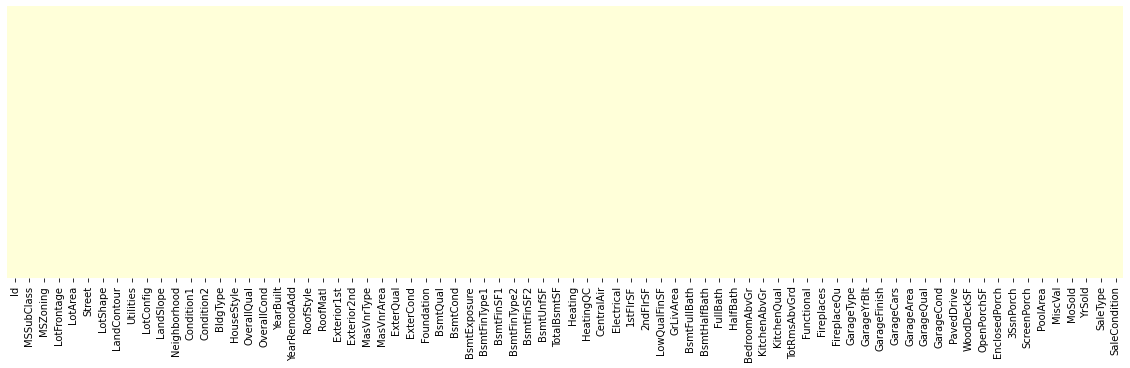

In [45]:
fig, ax = plt.subplots(figsize=(20,5)) 
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu',ax=ax)

In [46]:
missing_zero_values_table(test_df)

Your selected dataframe has 76 columns and 1459 Rows.
There are 1 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Data Type
MSZoning,0,4,0.3,object


In [47]:
test_df.shape

(1459, 76)

In [48]:
test_df.to_csv('cleaned_test.csv',index=False)